## Predicción de actividad humana de acuerdo a los sensores de un smartphone

Se importan los paquetes necesarios.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA 


from sklearn.metrics import ConfusionMatrixDisplay

#Evitar la impresión de warnings
import warnings
warnings.filterwarnings("ignore")

## Lectura de los datos.

Sabiendo que a la hora de recopilar los datos que se van a emplear en el proyecto, se construyeron dos bases de datos separadas (train y test), se cargan las dos bases de datos y se emplean siguiendo esta separación de los datos.

Primero los datos de entrenamiento.

In [2]:
df_train = pd.read_csv("train.csv")
df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


Ahora los datos de prueba.

In [3]:
df_test = pd.read_csv("test.csv")
df_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


Se verifica que no haya celdas sin valor en ambas bases de datos.

In [4]:
df_train.isnull().values.any()

False

In [5]:
df_test.isnull().values.any()

False

Se visualizan ciertos atributos interesantes de la base de datos antes de separar la columna objetivo.

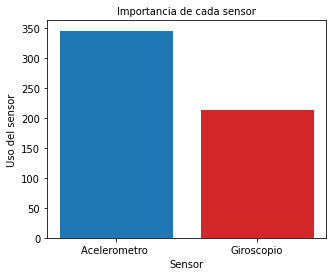

In [6]:
Acc=0
Gyro=0
other=0 
for i in df_train.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(5, 4))
plt.bar(x = ['Acelerometro ','Giroscopio'], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Importancia de cada sensor", fontsize =10)
plt.xlabel("Sensor", size=10)
plt.ylabel("Uso del sensor", size=10)
plt.xticks(fontsize=10)
plt.show()

Vemos como claramente se emplea más el acelerometró a la hora de recopilar los datos.

En este punto se observa la densidad de los datos de la columna objetivo, es decir las actividades realizadas.
Se analizan las actividades por separado bajo la variable `tBodyAccMag`

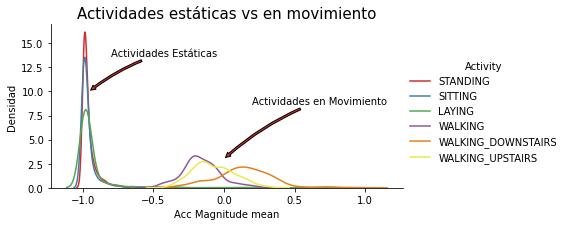

In [7]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df_train, hue='Activity',aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Actividades Estáticas", xy=(-0.956,10), xytext=(-0.8, 14), size=10,
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Actividades en Movimiento", xy=(0,3), xytext=(0.2, 9), size=10, va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Actividades estáticas vs en movimiento', fontsize=15)
plt.xlabel("Acc Magnitude mean", size=10)
plt.ylabel('Densidad', size=10)
plt.show()

Observe que se separan claramente las actividades en las que el sujeto de prueba se debe desplazar y en las que no.

---

Sabiendo que la columna 'subject' no es relevante para la clasificación la podemos remover.

Así mismo removemos la columna objetivo.

In [8]:
X_train = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
X_valid = pd.DataFrame(df_test.drop(['Activity','subject'],axis=1))

y_train_ORG = df_train.Activity.values.astype(object)
y_valid_ORG = df_test.Activity.values.astype(object)

En este punto codificamos la columna objetivo para que tome valores enteros y así facilitar futuros calculos.

In [9]:
encoder = preprocessing.LabelEncoder()
encoder.fit(y_train_ORG)
y_train = encoder.transform(y_train_ORG)
# vizualizamos
y_train

array([2, 2, 2, ..., 5, 5, 5])

In [10]:
encoder = preprocessing.LabelEncoder()
encoder.fit(y_valid_ORG)
y_valid = encoder.transform(y_valid_ORG)
# vizualizamos
y_valid

array([2, 2, 2, ..., 5, 5, 5])

La codificación resultante es de la siguiente manera:

* `LAYING`: 0
* `SITTING`: 1
* `STANDING`: 2
* `WALKING`: 3
* `WALKING_DOWNSTAIRS`: 4
* `WALKING_UPSTAIRS`: 5

## Entrenamiento del modelo.


Inicialmente se estudia con los parametros por defecto 

In [11]:
svc = SVC() 

Se ajusta el clasificador al conjunto de entrenamiento

In [12]:
svc.fit(X_train,y_train)

SVC()

Se realizan las predicciones con el conjunto de prueba.

In [13]:
y_pred = svc.predict(X_valid)

Se calcula el puntaje de accuracy.

Acá es importante aclarar que y_valid son las etiquetas verdaderas, y_pred son las etiquetas predecidas, y esto se realiza en el conjunto de pueba.

In [14]:
acc = accuracy_score(y_valid, y_pred)
print('Accuracy del modelo con los parametros por defecto: ', acc)

Accuracy del modelo con los parametros por defecto:  0.9504580929759077


Se observa que el modelo creado con los parametros por defecto es bastante bueno. Sin embargo, más adelante se intentará mejorar el modelo.

Calculamos y visualizamos la matriz de confusión.

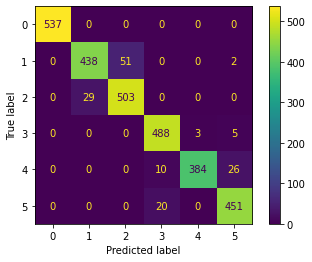

In [15]:
L = [0,1,2,3,4,5]

cm = confusion_matrix(list(y_valid), list(y_pred), labels = L) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = L )
disp.plot(xticks_rotation = 'horizontal')
plt.show()


Recordando que se hizo una codificación de la columna objetivo, las etiquetas de la matriz corresponden a esta codificación.
* `LAYING`: 0
* `SITTING`: 1
* `STANDING`: 2
* `WALKING`: 3
* `WALKING_DOWNSTAIRS`: 4
* `WALKING_UPSTAIRS`: 5

## Busqueda del modelo óptimo. 

Ahora se buscan los parámetros óptimos empleando distintos nucleos (kernels).

In [16]:
num_features = np.size(X_train, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}, 
]


optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5, # cross validation, puedo meterle mas
        scoring='roc_auc', # area bajo la curva
        verbose=0 
    )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.0017825311942959, 'kernel': 'linear'}


Una vez encontrados los parametros optimos se procede a entrenar una SVM con tales parametros.

In [17]:
cc = optimal_params.best_params_['C']
gg = optimal_params.best_params_['gamma']
kk = optimal_params.best_params_['kernel']

svc = SVC(C = cc, gamma = gg, kernel = kk)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.0017825311942959, kernel='linear')

Se realizan las predicciones nuevamente.

In [18]:
y_pred = svc.predict(X_valid)

Se computa el puntaje de accuracy de nuevo.

In [19]:
acc = accuracy_score(y_valid, y_pred)
print('Accuracy del modelo con los parametros optimos: ', acc)

Accuracy del modelo con los parametros optimos:  0.9640312181879878


Vemos como el puntaje de accuracy aumentó sutilmente, tan solo aumentó 0.0135

Finalmente se crea la nueva matriz de confusión.

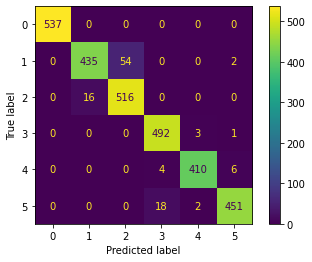

In [20]:
L = [0,1,2,3,4,5]
cm = confusion_matrix(list(y_valid), list(y_pred), labels = L) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = L )
disp.plot(xticks_rotation = 'horizontal')
plt.show()

Se observa que aunque el cambio es pequeño, se realizán mejor las predicciones. 

## Análisis de componentes principales (PCA)

Se realiza PCA para observar el comportamiento de los datos descrito por las dos primeras componentes principales.

In [21]:
pca = PCA() 
X_train_pca = pca.fit_transform(X_train)

In [22]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]


## pc1 contiene las coordenadas del eje x, después de aplicar PCA.
## pc2 contiene las coordenadas del eje y, después de aplicar PCA.

## Ahora centramos y escalamos los datos.
pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Optimizamos los hiperparámetros con los datos luego de la reducción de dimensión

num_features = np.size(pca_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['linear']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', 
        verbose=0 
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'linear'}


Realizamos un grafico para visualizar los resultados.

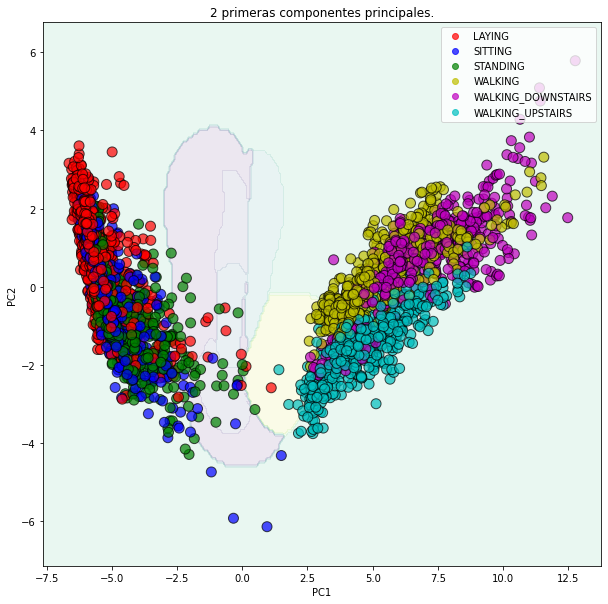

In [23]:
cc = optimal_params.best_params_['C']
gg = optimal_params.best_params_['gamma']
kk = optimal_params.best_params_['kernel']

clf_svm = SVC(random_state=42, C=cc, gamma=gg)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_valid)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))


Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1)


cmap = colors.ListedColormap(['r', 'b', 'g', 'y', 'm', 'c'])


scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_valid, 
               cmap=cmap, 
               s=100, 
               edgecolors='k',
               alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")

legend.get_texts()[0].set_text("LAYING")
legend.get_texts()[1].set_text("SITTING")
legend.get_texts()[2].set_text("STANDING")
legend.get_texts()[3].set_text("WALKING")
legend.get_texts()[4].set_text("WALKING_DOWNSTAIRS")
legend.get_texts()[5].set_text("WALKING_UPSTAIRS")


ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('2 primeras componentes principales.')

plt.show()

Se observa una separación clara entre las actividades que implican caminar, y las actividades donde el individuo está más quieto, lo cual es una muestra del por qué el modelo funciona tan bien. 

## T-distributed Stochastic Neighbor Embedding (T-SNE)

Ahora usaremos T-SNE que tambien sirve para reducir la dimensión de los datos, con el fin de comparar con PCA.
Para graficar se tuvo como guía el siguiente [artículo](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html) 

[Text(0.5, 1.0, 'Proyección T-SNE')]

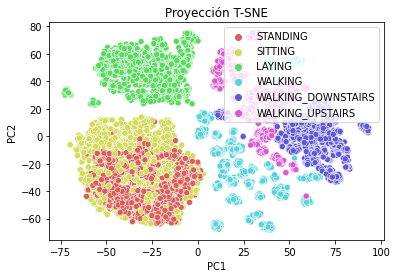

In [24]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X_train)
tsne_df = pd.DataFrame({'PC1': X_embedded[:,0], 'PC2': X_embedded[:,1] })

sns.scatterplot(x=tsne_df['PC1'], y=tsne_df['PC2'], hue=y_train_ORG.tolist(),
                palette=sns.color_palette("hls", 6),
                data=X_train).set(title="Proyección T-SNE") 

Observe como se obtuvo una separación similar a la de PCA en el sentido de las actividades que implican caminar, y las actividades donde el individuo está más quieto.

# Referencias

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

